In [509]:
!{sys.executable} -m pip install -v "opencv-python==4.5.1.48"
!{sys.executable} -m pip install matplotlib

Using pip 21.1.2 from d:\projects\put\computer-vision-project-2\venv\lib\site-packages\pip (python 3.7)
Non-user install because user site-packages disabled
Created temporary directory: C:\Users\aszcz\AppData\Local\Temp\pip-ephem-wheel-cache-z8451bra
Created temporary directory: C:\Users\aszcz\AppData\Local\Temp\pip-req-tracker-9y9kbgdr
Initialized build tracking at C:\Users\aszcz\AppData\Local\Temp\pip-req-tracker-9y9kbgdr
Created build tracker: C:\Users\aszcz\AppData\Local\Temp\pip-req-tracker-9y9kbgdr
Entered build tracker: C:\Users\aszcz\AppData\Local\Temp\pip-req-tracker-9y9kbgdr
Created temporary directory: C:\Users\aszcz\AppData\Local\Temp\pip-install-gb07j760
Created temporary directory: C:\Users\aszcz\AppData\Local\Temp\pip-unpack-y1clsn_l
Removed build tracker: 'C:\\Users\\aszcz\\AppData\\Local\\Temp\\pip-req-tracker-9y9kbgdr'


In [510]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

Load image

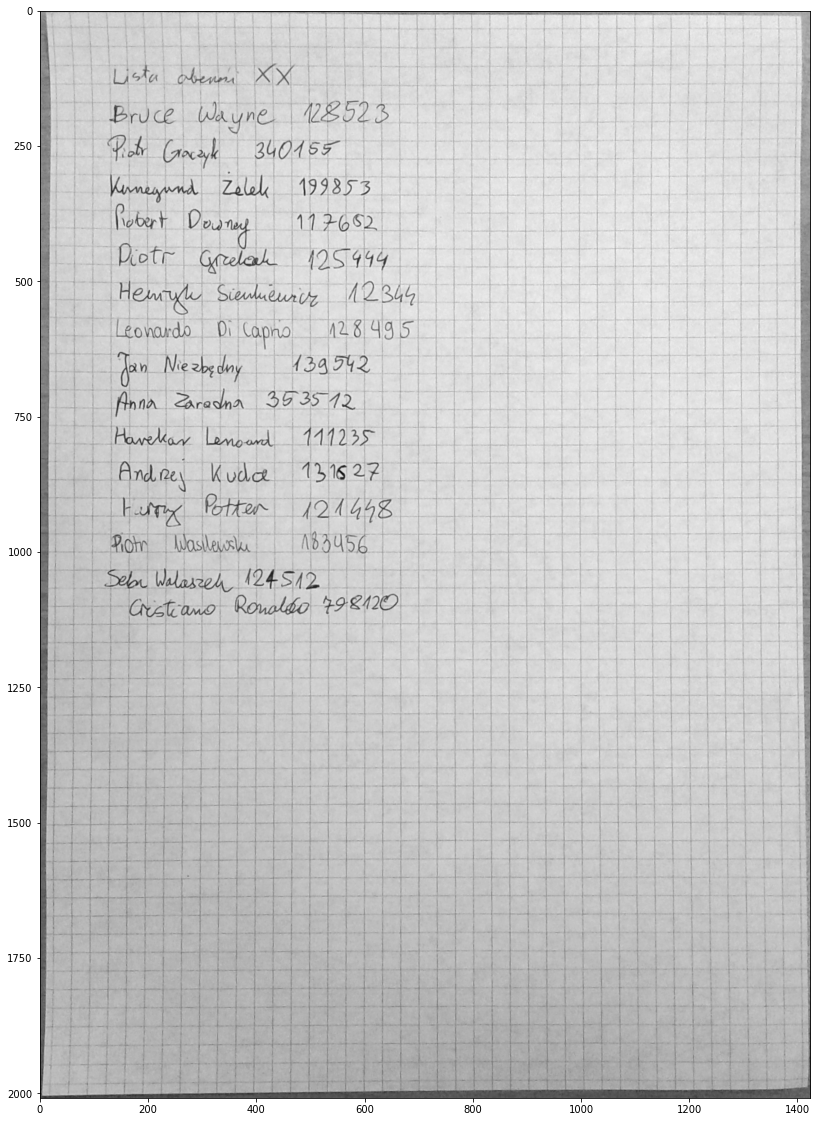

In [511]:
image_orig = cv.imread('straightened.png', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 20))
plt.imshow(image_orig, cmap='gray')
plt.show()

Denoise image and use Sobel edge detection

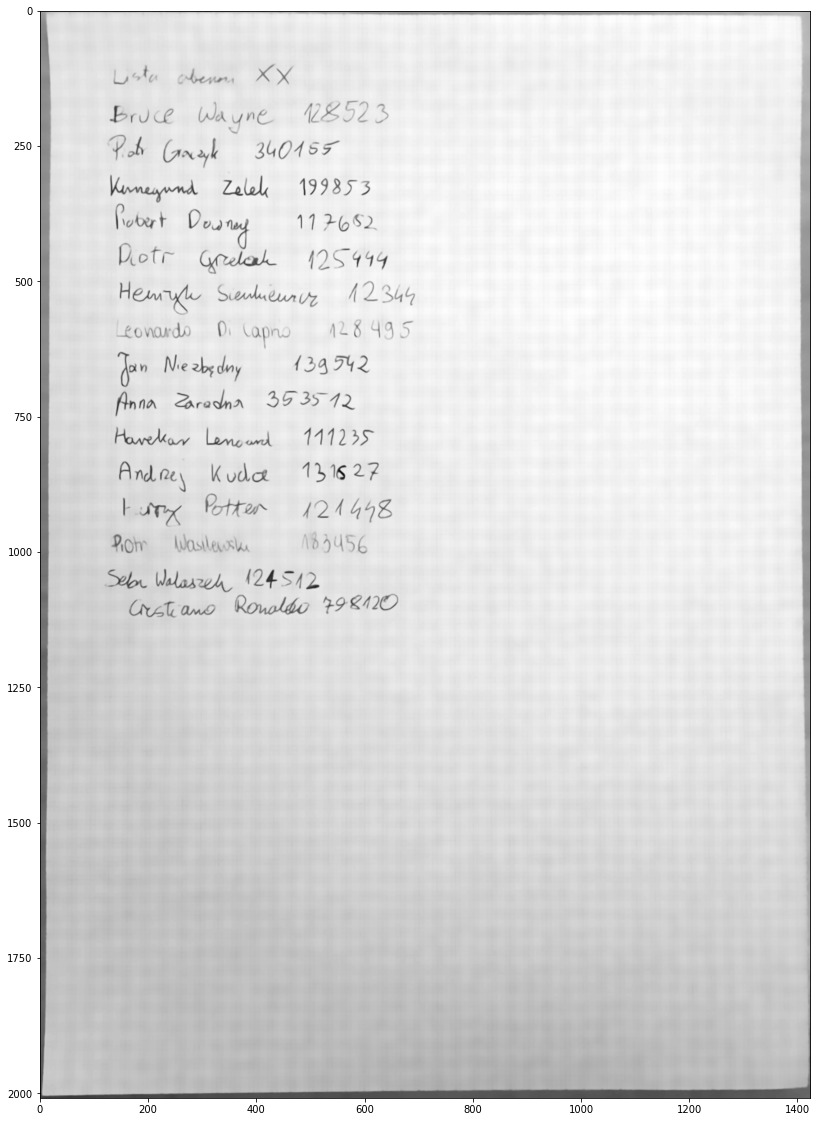

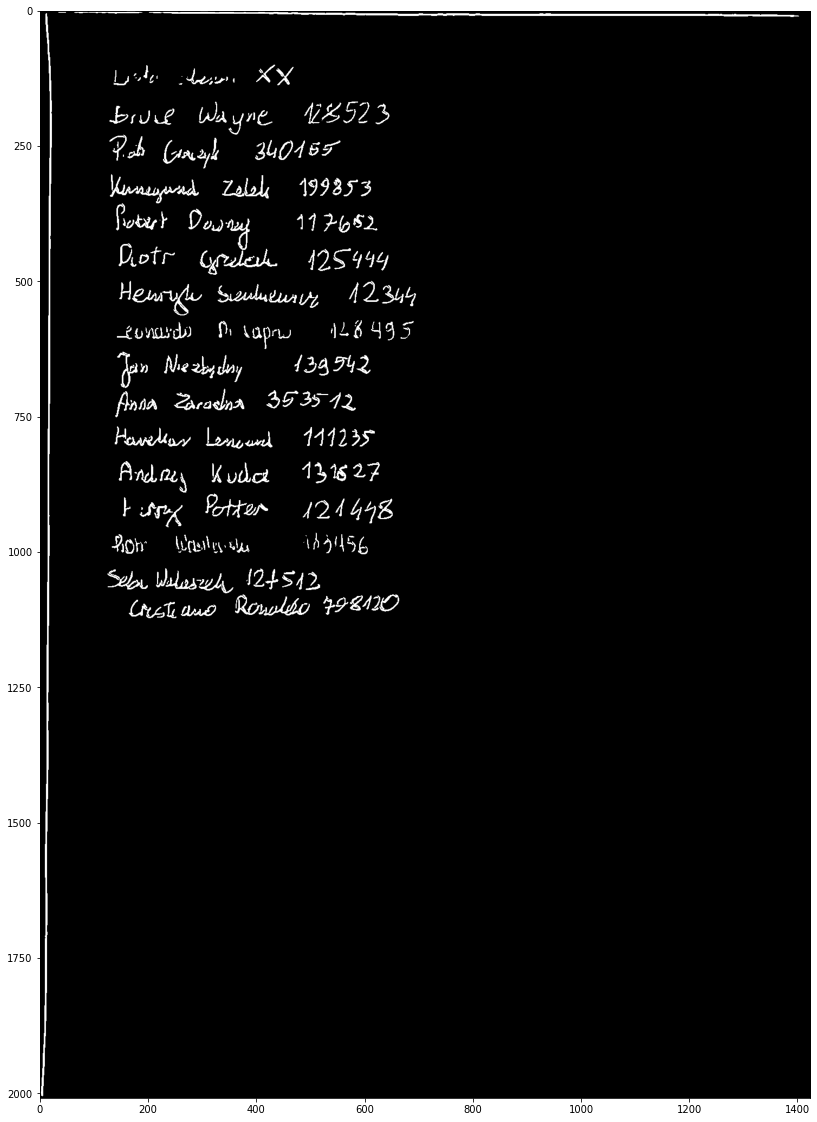

In [512]:
# https://docs.opencv.org/master/d1/d79/group__photo__denoise.html#ga4c6b0031f56ea3f98f768881279ffe93
sobel = None
image = None

for i in range(20, 40):
    image = cv.fastNlMeansDenoising(image_orig, None, i, 5, 21)

    sobelx = cv.Sobel(image, cv.CV_8U, 1, 0, ksize=3)
    sobely = cv.Sobel(image, cv.CV_8U, 0, 1, ksize=3)

    sobelx = cv.fastNlMeansDenoising(sobelx, None, 15, 5, 21)
    sobely = cv.fastNlMeansDenoising(sobely, None, 15, 5, 21)

    sobel = cv.add(sobelx, sobely)
    _, sobel = cv.threshold(sobel, 32, 255, cv.THRESH_BINARY)

    if (np.count_nonzero(sobel) / (sobel.shape[0] * sobel.shape[1])) < 0.0221:
        break

plt.figure(figsize=(20, 20))
plt.imshow(image, cmap='gray')
plt.show()

plt.figure(figsize=(20, 20))
plt.imshow(sobel, cmap='gray')
plt.show()


Detect lines

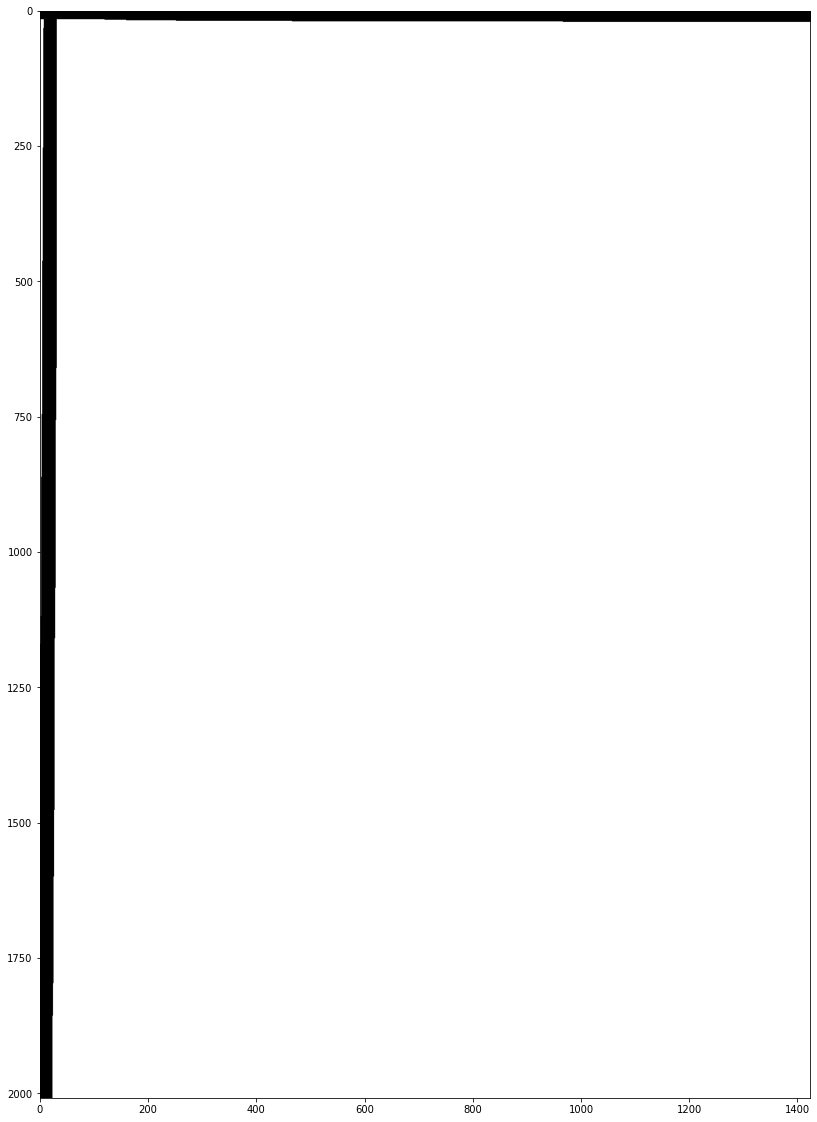

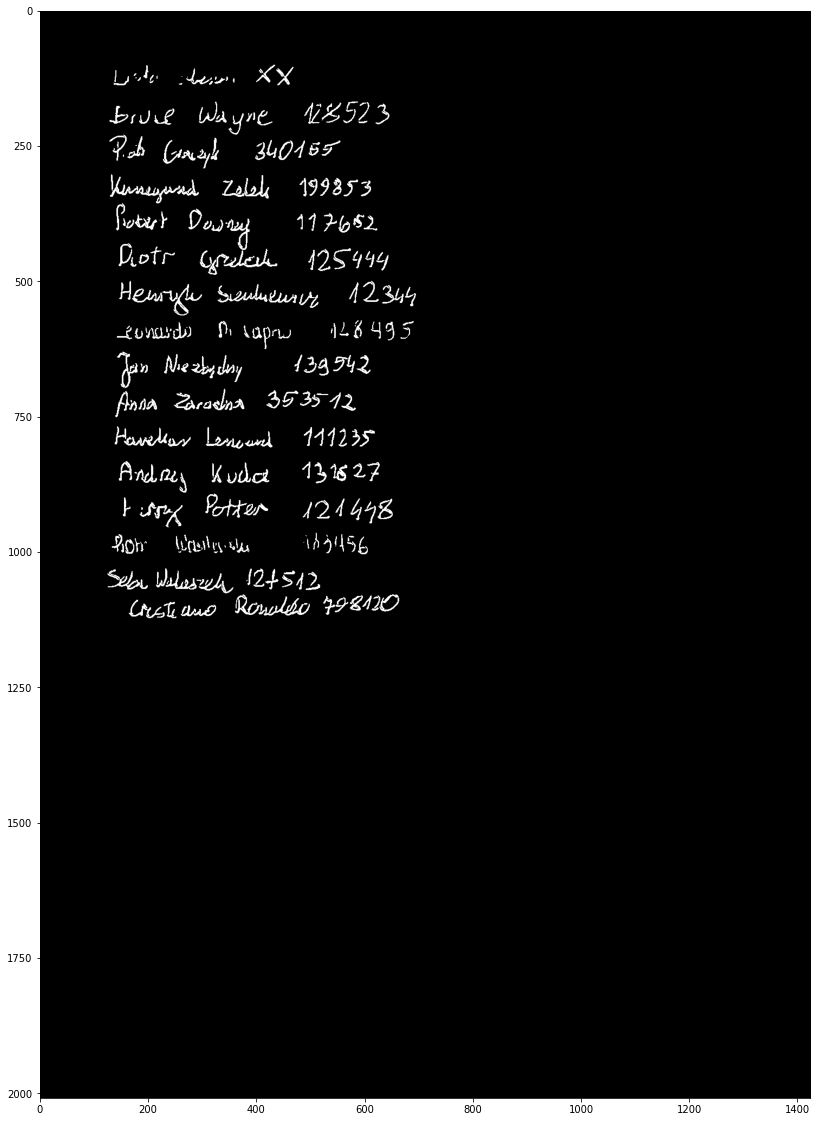

In [513]:
kernel = np.ones((1, 8), np.uint8)
erosion_1 = cv.erode(sobel, kernel, iterations=10)
# kernel = np.ones((3, 5), np.uint8)
# erosion_1 = cv.dilate(erosion_1, kernel, iterations=10)
kernel = np.ones((3, 80), np.uint8)
erosion_1 = cv.dilate(erosion_1, kernel, iterations=10)
# kernel = np.ones((5, 5), np.uint8)
# erosion = cv.erode(erosion, kernel, iterations=1)

kernel = np.ones((8, 1), np.uint8)
erosion_2 = cv.erode(sobel, kernel, iterations=20)
# kernel = np.ones((5, 3), np.uint8)
# erosion_2 = cv.dilate(erosion_2, kernel, iterations=10)
kernel = np.ones((80, 3), np.uint8)
erosion_2 = cv.dilate(erosion_2, kernel, iterations=10)

mask = np.add(erosion_1, erosion_2)
mask = cv.bitwise_not(mask)

plt.figure(figsize=(20, 20))
plt.imshow(mask, cmap='gray')
plt.show()

sobel_no_border = cv.bitwise_and(sobel, mask)
plt.figure(figsize=(20, 20))
plt.imshow(sobel_no_border, cmap='gray')
plt.show()

Save result image

In [514]:
cv.imwrite("removed_lines.png", sobel)

True

Use Laplacian edge detection (just an example, not used in main pipeline)

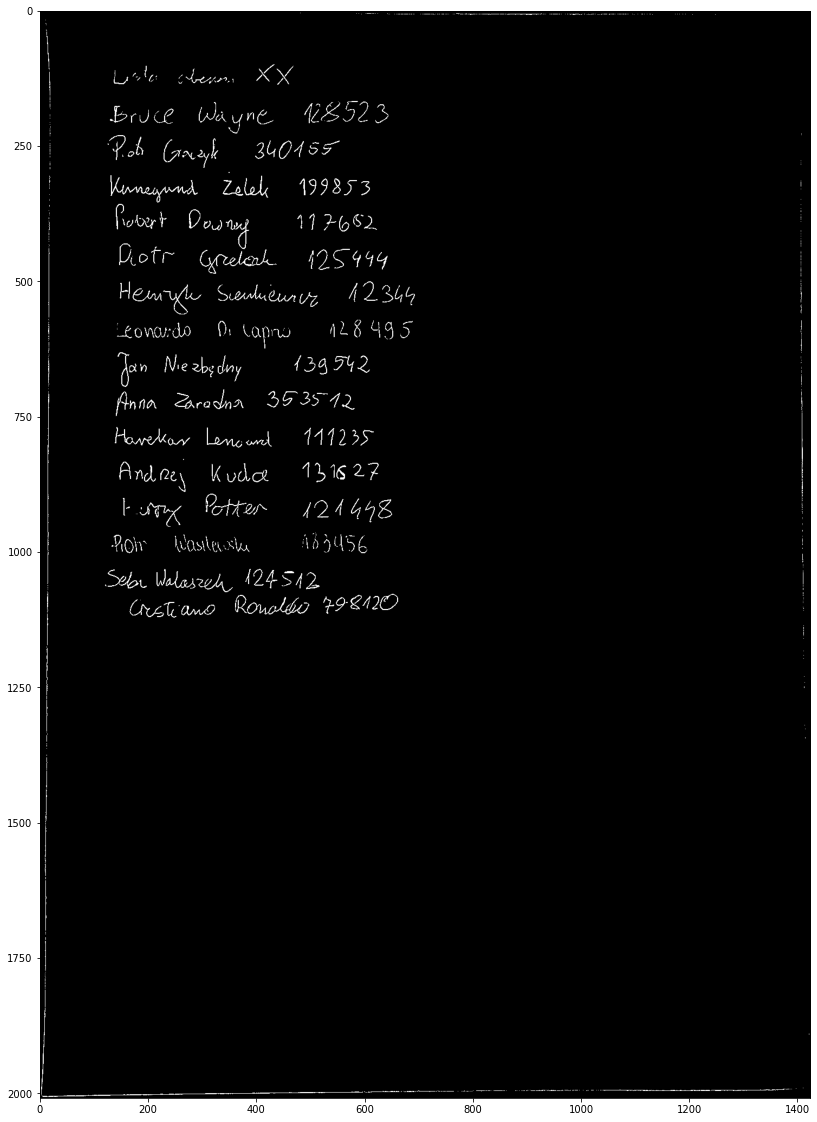

In [515]:
laplacian = cv.Laplacian(image, cv.CV_8U)

_, laplacian = cv.threshold(laplacian, 8, 255, cv.THRESH_BINARY)

plt.figure(figsize=(20, 20))
plt.imshow(laplacian, cmap='gray')
plt.show()

Denoise laplacian image

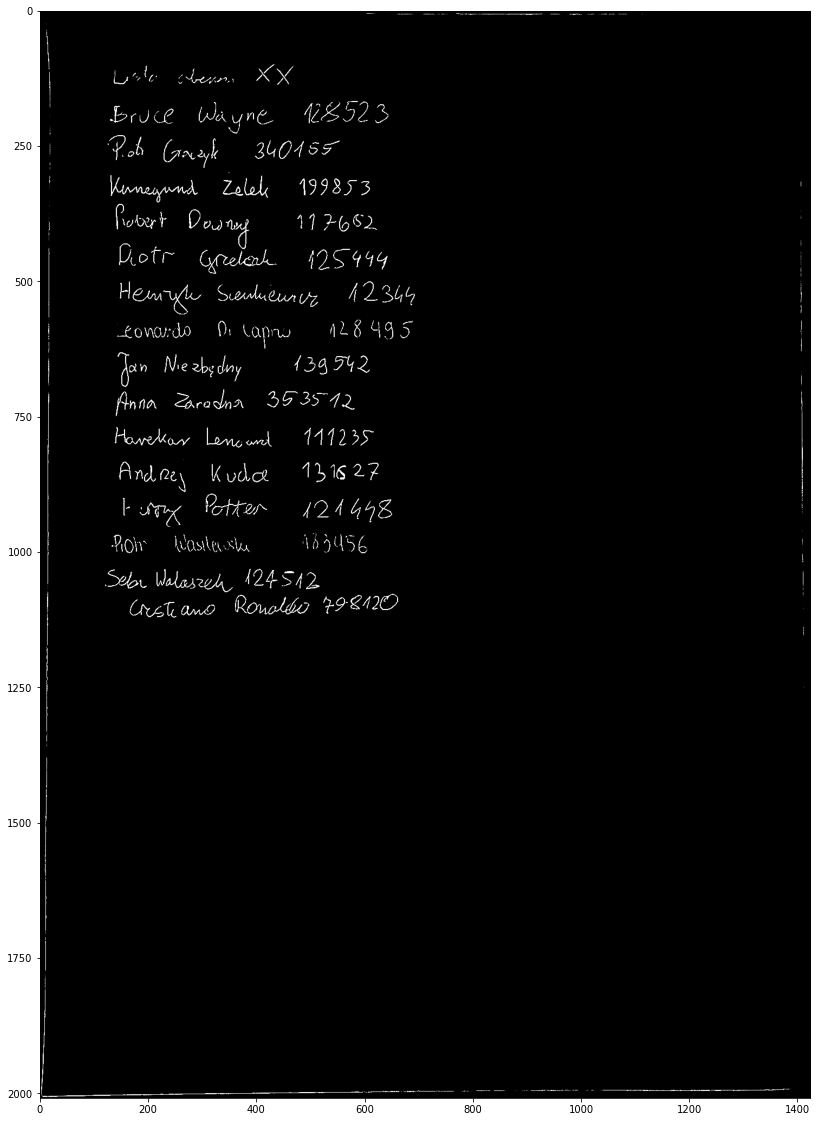

In [516]:
denoised_laplacian = cv.fastNlMeansDenoising(laplacian, None, 30, 7, 21)

plt.figure(figsize=(20, 20))
plt.imshow(denoised_laplacian, cmap='gray')
plt.show()


